# Time Series Analysis: Natural Gas Consumption

**Peishan Liu, Juntao Zhang, Hongyue Zhu**

## Get the Data

**Download the data**

We get the monthly data of total natural gas consumption in billion cubic feet in the U.S. from 1973 January to 2022 January.

In [1]:
import pandas as pd

data = pd.read_excel("Data.xlsx", usecols=["Month", "Total Natural Gas Consumption"],index_col="Month")
data

,Total Natural Gas Consumption
Month,
1973-01-01,2348.000
1973-02-01,2126.000
1973-03-01,2015.000
1973-04-01,1835.000
1973-05-01,1729.000
...,...
2021-08-01,2410.372
2021-09-01,2110.497
2021-10-01,2237.992


**Visualize the data**

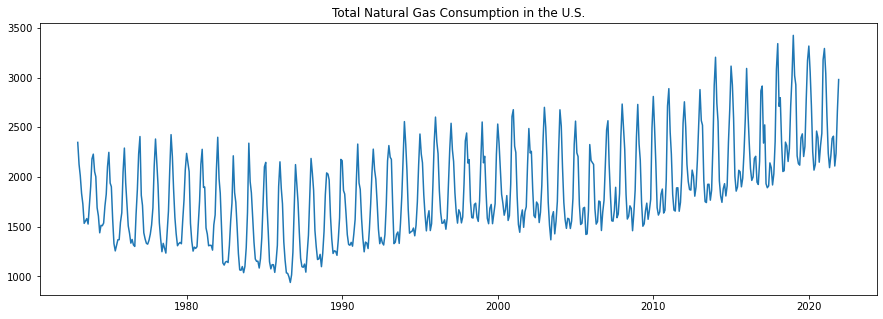

In [2]:
from pylab import rcParams

rcParams["figure.figsize"] = 15,5

import matplotlib.pyplot as plt

plt.plot(data)
plt.title("Total Natural Gas Consumption in the U.S.")
plt.show()

## Prepare the data

**Check stationarity of the data**

In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data["Total Natural Gas Consumption"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary.")
else:
    print("Weak evidence against null hypothesis. Time series is non-stationary.")

ADF Statistic: 0.487264
p-value: 0.984481
Weak evidence against null hypothesis. Time series is non-stationary.


**Decompose the data**

We try to make the data stationary.

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(data["Total Natural Gas Consumption"], model="additive",
                            period=12, extrapolate_trend="freq")

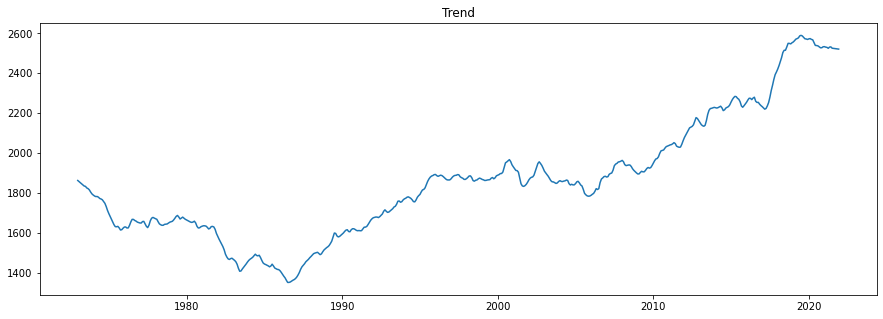

In [5]:
trend = decompose.trend
plt.plot(trend)
plt.title("Trend")
plt.show()

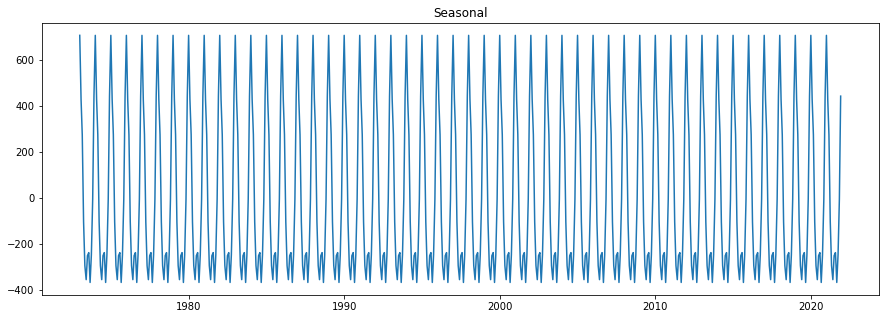

In [6]:
seasonal = decompose.seasonal
plt.plot(seasonal)
plt.title("Seasonal")
plt.show()

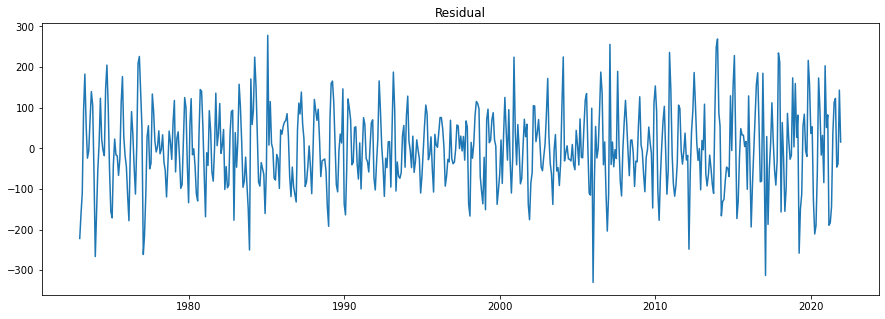

In [7]:
residual = decompose.resid
plt.plot(residual)
plt.title("Residual")
plt.show()

**Check stationarity of the residuals**

In [8]:
result = adfuller(residual)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary.")
else:
    print("Weak evidence against null hypothesis. Time series is non-stationary.")

ADF Statistic: -12.826532
p-value: 0.000000
Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary.


**Check ACF and PACF of the residuals**

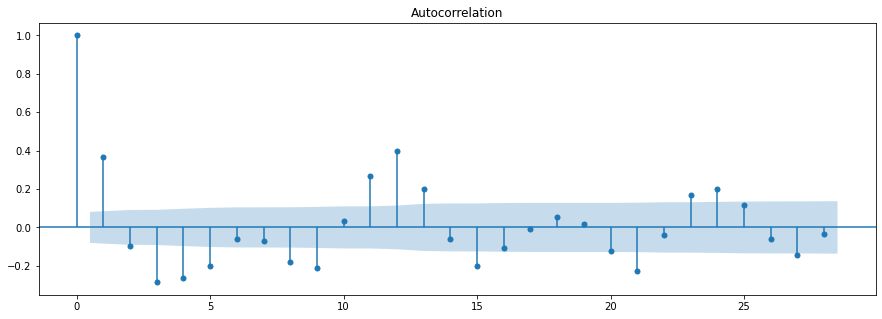

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residual)
plt.show()

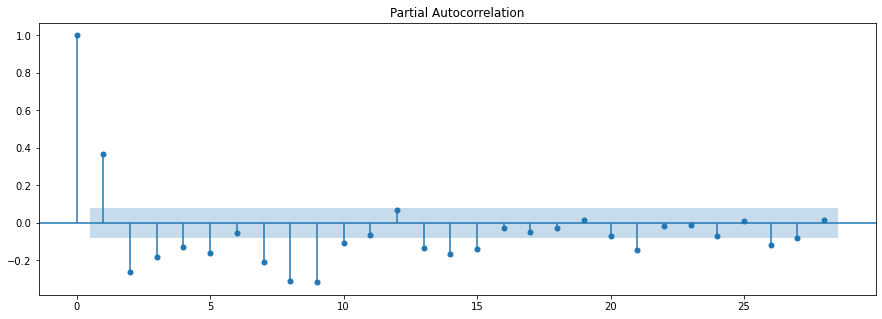

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(residual)
plt.show()

The autocorrelation function with lag 1 does not equal to 0, which is great.

**Split the data**

The train-test ratio is roughly 0.8:0.2.

In [11]:
train = residual[:"2011-12-01"]
train

Month
1973-01-01   -221.923820
1973-02-01   -159.172467
1973-03-01   -111.413835
1973-04-01     92.629113
1973-05-01    182.753793
                 ...    
2011-08-01     98.111045
2011-09-01     -6.099358
2011-10-01    -38.839676
2011-11-01     -7.201778
2011-12-01     37.433420
Name: resid, Length: 468, dtype: float64

In [12]:
test = residual["2012-01-01":]
test

Month
2012-01-01    -28.873110
2012-02-01    -17.554072
2012-03-01   -248.441254
2012-04-01    -57.491037
2012-05-01     41.645121
                 ...    
2021-08-01    122.961324
2021-09-01    -46.351142
2021-10-01    -38.467648
2021-11-01    143.237186
2021-12-01     15.454570
Name: resid, Length: 120, dtype: float64

## Model Selection

We want try ARMA model with different parameters of (p,q).

We select the best parameter based on AIC.

**Select p values based on PACF**

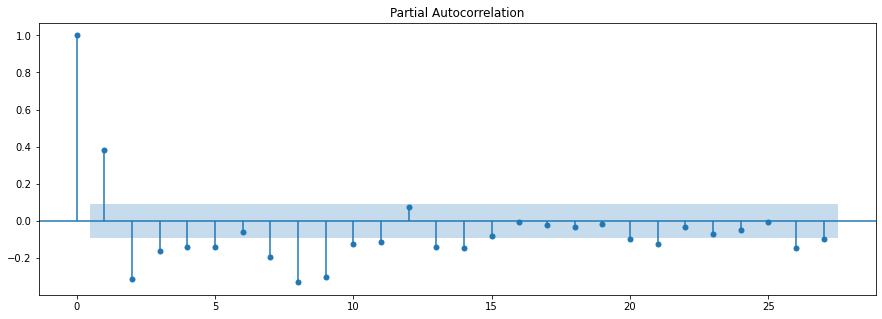

In [13]:
plot_pacf(train)
plt.show()

We will try p = 0,1,2,8,9.

**Select q values based on ACF**

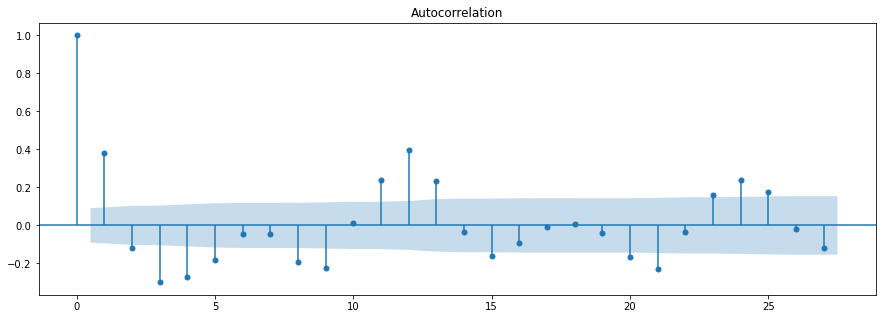

In [14]:
plot_acf(train)
plt.show()

We will try q = 0,1,3,4,12.

**Fit and evaluate models**

In [15]:
import warnings

warnings.filterwarnings("ignore")

In [16]:
import statsmodels.api as sm

for p in [0,1,2,8,9]:
    for q in [0,1,3,4,12]:
        model = sm.tsa.arima.ARIMA(train, order=(p,0,q)).fit()
        print("For p = ", p , " and q = ", q , ", AIC = ",model.aic)

For p =  0  and q =  0 , AIC =  5548.926171490446
For p =  0  and q =  1 , AIC =  5451.790540738746
For p =  0  and q =  3 , AIC =  5360.221601654686
For p =  0  and q =  4 , AIC =  5334.5450460027905
For p =  0  and q =  12 , AIC =  5286.9885632807545
For p =  1  and q =  0 , AIC =  5476.385134149663
For p =  1  and q =  1 , AIC =  5452.708894137941
For p =  1  and q =  3 , AIC =  5334.387705921802
For p =  1  and q =  4 , AIC =  5333.0558145386985
For p =  1  and q =  12 , AIC =  5289.059720101947
For p =  2  and q =  0 , AIC =  5431.193781789696
For p =  2  and q =  1 , AIC =  5305.606261108662
For p =  2  and q =  3 , AIC =  5289.145169605875
For p =  2  and q =  4 , AIC =  5289.178318804092
For p =  2  and q =  12 , AIC =  5257.018490212681
For p =  8  and q =  0 , AIC =  5339.190643861288
For p =  8  and q =  1 , AIC =  5269.823399612152
For p =  8  and q =  3 , AIC =  5240.694813403682
For p =  8  and q =  4 , AIC =  5238.841061231581
For p =  8  and q =  12 , AIC =  5241.582413

**Select the best model**

We select (p,q) = (8,4) as our parameter which minimizes AIC.

In [17]:
model = sm.tsa.arima.ARIMA(train, order=(8,0,4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                  468
Model:                 ARIMA(8, 0, 4)   Log Likelihood               -2605.421
Date:                Tue, 10 May 2022   AIC                           5238.841
Time:                        19:04:48   BIC                           5296.920
Sample:                    01-01-1973   HQIC                          5261.695
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0719      0.048     -1.505      0.132      -0.166       0.022
ar.L1          1.0174      0.091     11.217      0.000       0.840       1.195
ar.L2         -0.4408      0.156     -2.818      0.005      -0.747      -0.134
ar.L3         -0.8264      0.178     -4.633      0.000      -1.176      -0.477
ar.L4          0.8598      0.126      6.804      0.000       0.612       1.107
ar.L5         -0.5745      0.094     -6.100      0.000      -0.759      -0.390
ar.L6          0.1273      0.098      1.298      0.194      -0.065       0.320
ar.L7         -0.1276      0.096     -1.333      0.183      -0.315       0.060
ar.L8         -0.1576      0.068     -2.317      0.020      -0.291      -0.024
ma.L1         -0.9463      0.081    -11.718      0.000      -1.105      -0.788
ma.L2         -0.0502      0.135     -0.372      0.710      -0.315       0.214
ma.L3          0.8701      0.123      7.092      0.000       0.630       1.111
ma.L4         -0.8679      0.069    -12.520      0.000      -1.004      -0.732
sigma2      4393.1244    276.052     15.914      0.000    3852.073    4934.176
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                50.13
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.06
Prob(H) (two-sided):                  0.91   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict and Forecast

**Plot the in-sample prediction on residuals**

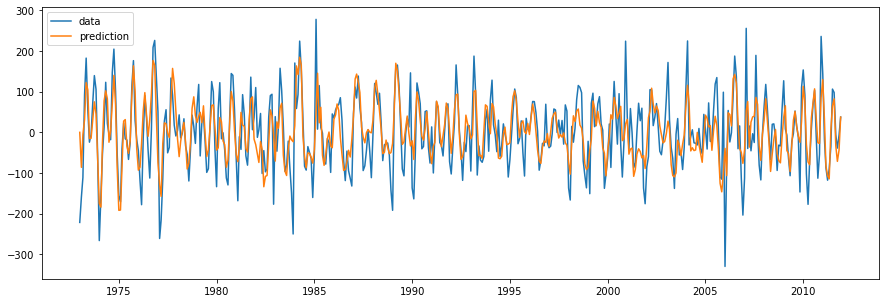

In [18]:
in_sample = model.predict(start=0, end=len(train)-1)
plt.plot(train,label="data")
plt.plot(in_sample,label="prediction")
plt.legend(loc="upper left")
plt.show()

**Plot the out-of-sample prediction on residuals**

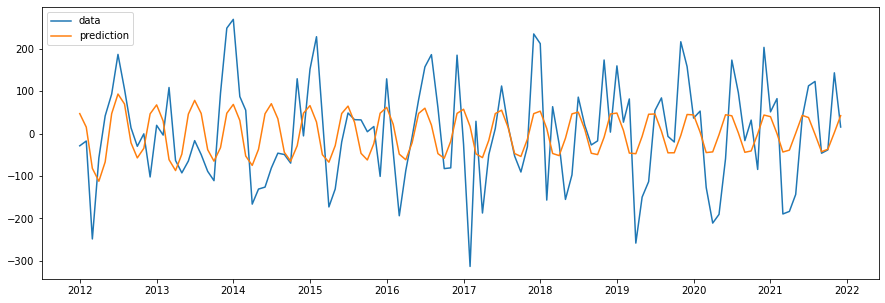

In [19]:
out_of_sample = model.forecast(steps=len(test))
plt.plot(test,label="data")
plt.plot(out_of_sample,label="prediction")
plt.legend(loc="upper left")
plt.show()

**Combine the in-sample and out-of-sample prediction on residuals**

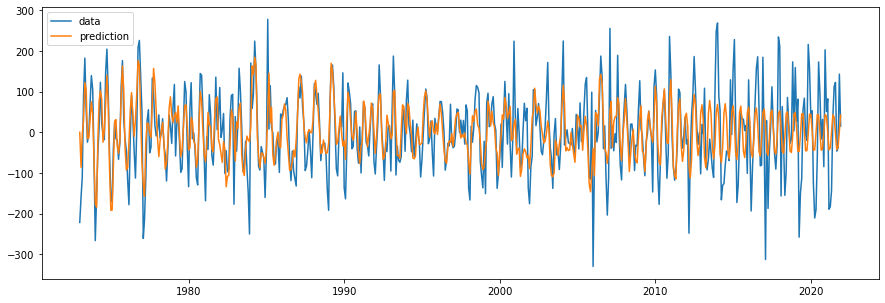

In [20]:
prediction = in_sample.append(out_of_sample)
plt.plot(residual,label="data")
plt.plot(prediction,label="prediction")
plt.legend(loc="upper left")
plt.show()

**Add back trend and seasonality**

In [21]:
predict_final = prediction + trend + seasonal

**Plot the overall prediction**

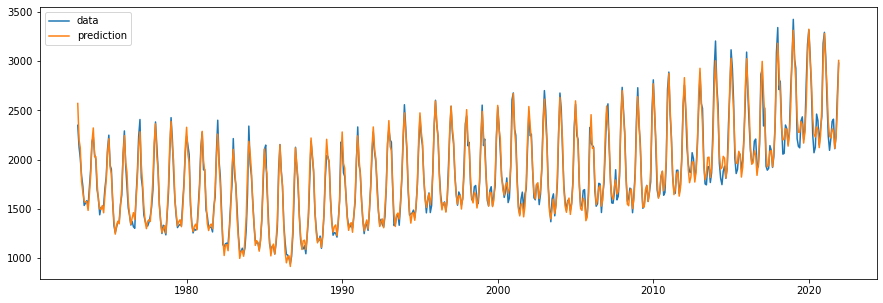

In [22]:
plt.plot(data,label="data")
plt.plot(predict_final,label="prediction")
plt.legend(loc="upper left")
plt.show()

**Forecast for the next year on residuals**

Now we want to make forecast for the next year. Residuals, seasonality, and trend all need to be forecasted.

We first make forecast on the residuals. We fit the model to the whole dataset of the residuals and forecast for the next year.

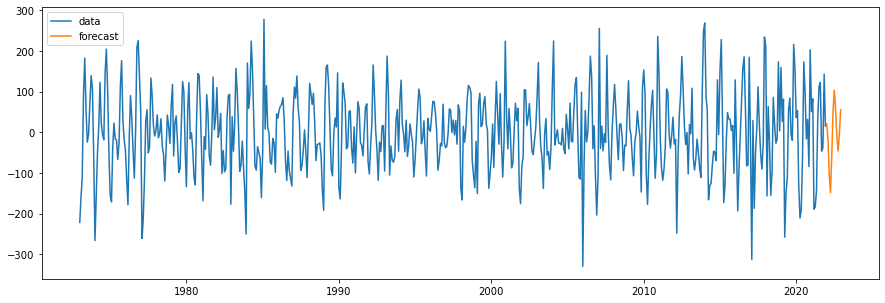

In [23]:
model = sm.tsa.arima.ARIMA(residual, order=(8,0,4)).fit()
forecast = model.forecast(steps=12)
plt.plot(residual,label="data")
plt.plot(forecast,label="forecast")
plt.legend(loc="upper left")
plt.show()

**Forecast the seasonality of next year**

We take a look at the seasonality data.

In [24]:
seasonal.head(12)

Month
1973-01-01    707.917944
1973-02-01    428.727488
1973-03-01    275.529754
1973-04-01   -102.952296
1973-05-01   -293.516079
1973-06-01   -354.588591
1973-07-01   -250.195400
1973-08-01   -237.085586
1973-09-01   -366.754142
1973-10-01   -246.248658
1973-11-01     -4.405514
1973-12-01    443.571080
Name: seasonal, dtype: float64

In [25]:
seasonal.tail(12)

Month
2021-01-01    707.917944
2021-02-01    428.727488
2021-03-01    275.529754
2021-04-01   -102.952296
2021-05-01   -293.516079
2021-06-01   -354.588591
2021-07-01   -250.195400
2021-08-01   -237.085586
2021-09-01   -366.754142
2021-10-01   -246.248658
2021-11-01     -4.405514
2021-12-01    443.571080
Name: seasonal, dtype: float64

We can clearly see that the pattern of seasonality does not change.

Therefore, the forecast of seasonality of next year is identical to the seasonality of the previous years.

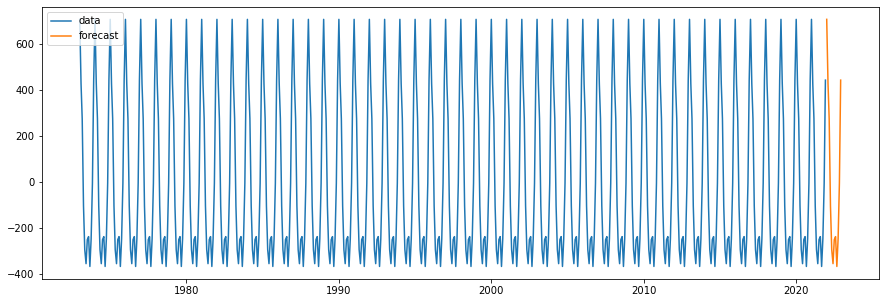

In [26]:
s = seasonal.tail(12).tolist()
forecast_seasonal = pd.DataFrame({"seasonality":s}, index = forecast.index)
plt.plot(seasonal,label="data")
plt.plot(forecast_seasonal,label="forecast")
plt.legend(loc="upper left")
plt.show()

**Forecast the trend of next year**

We try 1st order polynomial regression first.

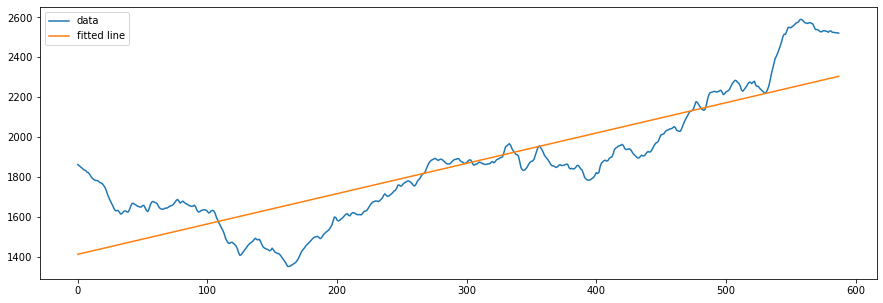

In [27]:
import numpy as np

x = np.arange(0, len(trend))
y = np.array(trend)
fit1 = np.polyfit(x,y,1)
fit_function1 = np.poly1d(fit1)

plt.plot(x, y, label="data")
plt.plot(x, fit_function1(x), label="fitted line")
plt.legend(loc="upper left")
plt.show()

We then try 2nd order polynomial regression to see if it can better fit the trend.

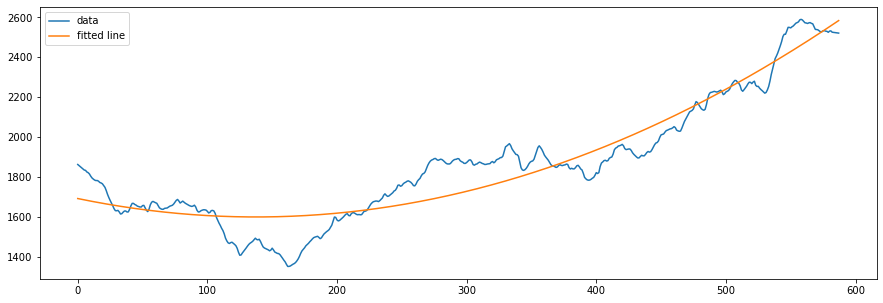

In [28]:
fit2 = np.polyfit(x,y,2)
fit_function2 = np.poly1d(fit2)

plt.plot(x, y, label="data")
plt.plot(x, fit_function2(x), label="fitted line")
plt.legend(loc="upper left")
plt.show()

The 2nd order polynomial regression fits fairly good.

We make forecast of the trend based on the 2nd order polynomial regression.

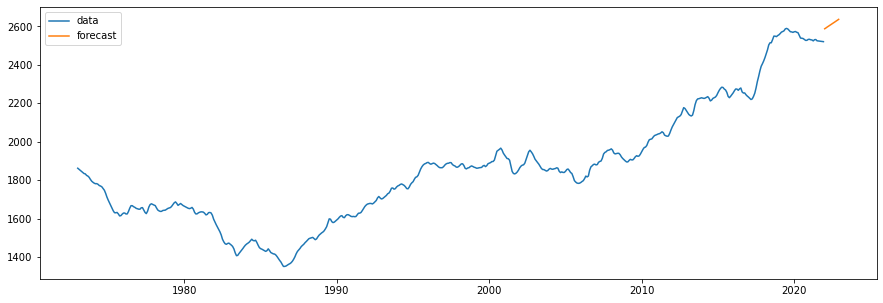

In [29]:
a,b,c = fit2[0], fit2[1], fit2[2]
forecast_x = np.arange(len(trend), len(trend)+12)
t = a*forecast_x**2 + b*forecast_x + c
forecast_trend = pd.DataFrame({"trend":t}, index = forecast.index)

plt.plot(trend,label="data")
plt.plot(forecast_trend,label="forecast")
plt.legend(loc="upper left")
plt.show()

**Overall forecast of next year**

We add the forecast of residuals, forecast of seasonality, forecast of trend all together.

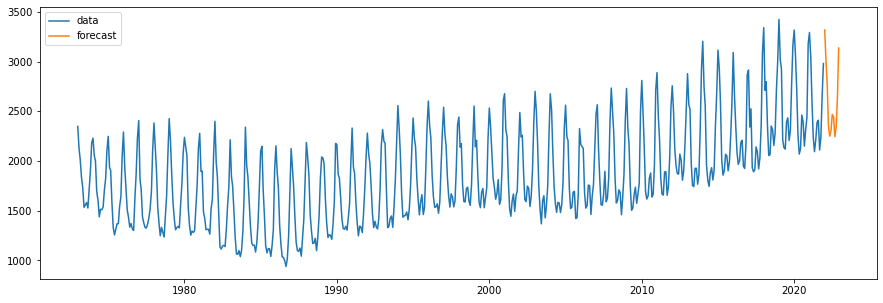

In [30]:
forecast_final = forecast + forecast_seasonal["seasonality"] + forecast_trend["trend"]

plt.plot(data,label="data")
plt.plot(forecast_final,label="forecast")
plt.legend(loc="upper left")
plt.show()